# Practica 0

### Check python version

In [1]:
from platform import python_version
print(python_version())

3.6.9


## Imports 

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Ejercicio 1

In [3]:
def leeimagen(filename,flagColor):
    image = cv2.imread(filename,flagColor)

    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
    return image

La etiqueta ```flagColor``` sirve para seleccionar si la visualización sera en blanco y negro (```0```) o en color(```1```)

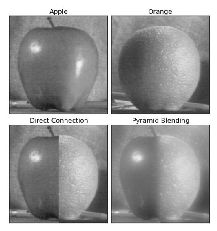

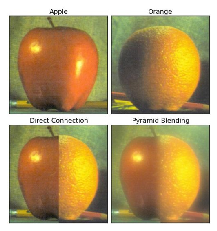

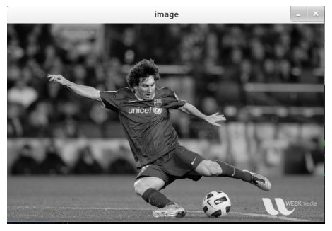

In [4]:
imagenBN = leeimagen("images/orapple.jpg", 0)
imagenColor = leeimagen("images/orapple.jpg", 1)
imagenMessi = leeimagen("images/messi.jpg",1)

## Ejercicio 2

In [5]:
def pintaI(im):
    plt.axis("off")
    plt.imshow(im)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

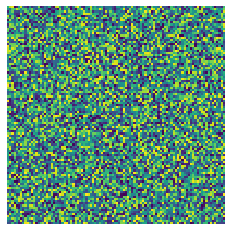

In [6]:
matrix = np.random.random((100,100))
pintaI(matrix)

## Ejercicio 3

Primero hacemos una función que nos indica si una imagen está en blanco y negro. Por lo general ```shape``` nos devuelve el número de filas, columnas y canales, pero si la imagen esta en blanco y negro solo devuelve filas y columnas. [Info](https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html)

In [7]:
def isBW(im):
  return len(im.shape) == 2

Para poder visualizar las imagenes juntas utilizmos ```hconcat```, es necesario que todas las imagenes (tratadas como matrices) tengan la misma dimension y profundidad [Info](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaf9771c991763233866bf76b5b5d1776f) 

Para ello transformamos todas las imagenes a imagenes a color (1), y adecuamos la altura a altura maxima (2).

Para hacer esto último utilizamos ```copyMakeBorder``` [Info](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36)

In [64]:

def pintaMI(vim, titulo='Imagenes'):

  altura = max(im.shape[0] for im in vim)

  for i,im in enumerate(vim):
    if isBW(im): # (1)
      vim[i] = cv2.cvtColor(vim[i], cv2.COLOR_GRAY2BGR)

    if im.shape[0] < altura: # (2)
      vim[i] = cv2.copyMakeBorder(
        vim[i], 0, altura - vim[i].shape[0],
        0, 0, cv2.BORDER_CONSTANT, value = (0,0,0)
      )
    


    imMulti = cv2.hconcat(vim) # FIX this
    plt.axis("off")
    plt.imshow(cv2.cvtColor(imMulti, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.title(titulo)

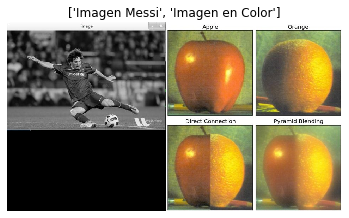

In [14]:
vim = [imagenMessi, imagenColor]
tit =  ['Imagen Messi', 'Imagen en Color']
pintaMI(vim, tit)

## Ejercicio 4

Declaramos la función ```modPixeles``` que acepta dos parámetros:
+ ```im```: La imagen a editar.
+ ```pixels```: La lista de pixeles a editar.

In [59]:
def modPixeles(im, pixels):
  color = (0,0,0)

  if isBW(im):
    color = 0

  for pixel in pixels:
    im[pixel] = color


Probaremos este ejercicio y el 5 en el mismo ejemplo.

## Ejercicio 5

In [60]:
def representaIm(vim, titulos):
  pintaMI(vim, titulo = " | ".join(titulos))


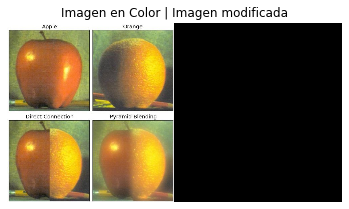

In [63]:
tit = ['Imagen en Color']
vim = [imagenColor]
modificada = np.copy(imagenColor)
altura, anchura, *rest = modificada.shape
modPixeles(modificada,
             [(x,y) for x in range(altura) for y in range(anchura)])

representaIm(vim + [modificada], tit + ["Imagen modificada"])